CPME 255 Project

The objective of the course project is to apply all the skills and techniques learned during the
course to a real-world dataset. In this project, you will:
1. Find a real-world dataset of your choice online
2. Parse, clean and analyze data
3. Create visualization
4. Ask and answer interesting research questions about the data
5. Prepare a final report about the findings.
Evaluation criteria:
• You must ask and answer at least 5 questions about the dataset
• EDA must include some statistics and visualization
• Must include explanations apart from code
• Must not be plagiarized i.e., copy-pasted for somewhere else. Can take some part of
code and try to modify and create your own.
Target Audience
Be sure to target your report at people who may not know your area/domain well. Remember
that you want to convey that you have done a lot of analytical work and that rigor should be
conveyed, but not necessarily the calculations. It is important to start off so that the reader is
interested. What aspect of this analysis interested you? You could have chosen anything, but
you chose this particular topic. Why?
Breadth of Analysis
From a grade/score point of view, it is important to touch upon as many different aspects as
you can. These include the premise, asking the right questions, data manipulation, analysis,
visualization, and conclusion.
Length of your report
Typically, your report will be about 5-7 pages long. You can always include an appendix if you
have some supplementary material that you wish to include.
Note that several components have come together to make a good final project. It starts with
obtaining data (it always starts with this!), cleaning the data (Data Quality), manipulating the
data (shaping) to suit your analysis. Then you must decide on different analysis options, apply
those techniques. Make sure you are creating different graphs but present only the ones that
are informative. Make sure that your conclusions can be supported by your analysis, and that
the questions that you raised are answered appropriately.
Deliverables
You must submit the following:
1. The Final Report (text with graphs)
2. Your code
3. Data set or link



In [10]:
#Importing Libraries      
import pandas as pd
import numpy as np
import scipy.io
import os
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
'''
Step 1: Selecting and Loading a real-world dataset. (global-cybersecurity-threats-2015-2024)
'''
# Download latest version
path = kagglehub.dataset_download("atharvasoundankar/global-cybersecurity-threats-2015-2024")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\zipei\.cache\kagglehub\datasets\atharvasoundankar\global-cybersecurity-threats-2015-2024\versions\1


In [3]:
'''
Step 2: Perform data preparation and cleaning
• Load the dataset into Jupyter notebook
• Explore the basic information about the data, e.g., size of data ranges, some basic
statistics etc.
• Handle missing, incorrect and invalid data
• Perform any additional steps (parsing dates, feature engineering, create additional
columns etc.)

We can borrow homework 2's code here
'''
df=pd.read_csv(path+'/Global_Cybersecurity_Threats_2015-2024.csv')
print(df.head())


   Country  Year        Attack Type     Target Industry  \
0    China  2019           Phishing           Education   
1    China  2019         Ransomware              Retail   
2    India  2017  Man-in-the-Middle                  IT   
3       UK  2024         Ransomware  Telecommunications   
4  Germany  2018  Man-in-the-Middle                  IT   

   Financial Loss (in Million $)  Number of Affected Users Attack Source  \
0                          80.53                    773169  Hacker Group   
1                          62.19                    295961  Hacker Group   
2                          38.65                    605895  Hacker Group   
3                          41.44                    659320  Nation-state   
4                          74.41                    810682       Insider   

  Security Vulnerability Type Defense Mechanism Used  \
0          Unpatched Software                    VPN   
1          Unpatched Software               Firewall   
2              Weak 

In [4]:
'''
Step 3: Perform exploratory analysis and visualization
• Compute statistics for numeric columns
• Explore distribution of numeric columns using histograms etc.
• Explore relationship between various columns
• Make a note of interesting insights from the exploratory analysis
'''
# Display info about columns including non-null counts and data types
print("\nColumn Info:")
print(df.info())

# For a more detailed view of non-null counts and data types
print("\nDetailed Column Analysis:")
for column in df.columns:
    non_null_count = df[column].count()
    dtype = df[column].dtype
    print(f"Column: {column}")
    print(f"Non-null count: {non_null_count}")
    print(f"Data type: {dtype}")
    print("-" * 50)




Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB
None

Detailed Column A

In [5]:
# Analyze statistics based on data type
for column in df.columns:
    print(f"\nAnalyzing {column}:")
    if df[column].dtype == 'object':  # For categorical/string columns like country
        value_counts = df[column].value_counts()
        print(f"Most frequent value: {value_counts.index[0]} (occurs {value_counts.iloc[0]} times)")
        print(f"Least frequent value: {value_counts.index[-1]} (occurs {value_counts.iloc[-1]} times)")
    elif np.issubdtype(df[column].dtype, np.number):  # For numeric columns
        print(f"Maximum value: {df[column].max()}")
        print(f"Minimum value: {df[column].min()}")
        print(f"Average value: {df[column].mean():.2f}")


Analyzing Country:
Most frequent value: UK (occurs 321 times)
Least frequent value: China (occurs 281 times)

Analyzing Year:
Maximum value: 2024
Minimum value: 2015
Average value: 2019.57

Analyzing Attack Type:
Most frequent value: DDoS (occurs 531 times)
Least frequent value: Man-in-the-Middle (occurs 459 times)

Analyzing Target Industry:
Most frequent value: IT (occurs 478 times)
Least frequent value: Government (occurs 403 times)

Analyzing Financial Loss (in Million $):
Maximum value: 99.99
Minimum value: 0.5
Average value: 50.49

Analyzing Number of Affected Users:
Maximum value: 999635
Minimum value: 424
Average value: 504684.14

Analyzing Attack Source:
Most frequent value: Nation-state (occurs 794 times)
Least frequent value: Hacker Group (occurs 686 times)

Analyzing Security Vulnerability Type:
Most frequent value: Zero-day (occurs 785 times)
Least frequent value: Weak Passwords (occurs 730 times)

Analyzing Defense Mechanism Used:
Most frequent value: Antivirus (occurs 6

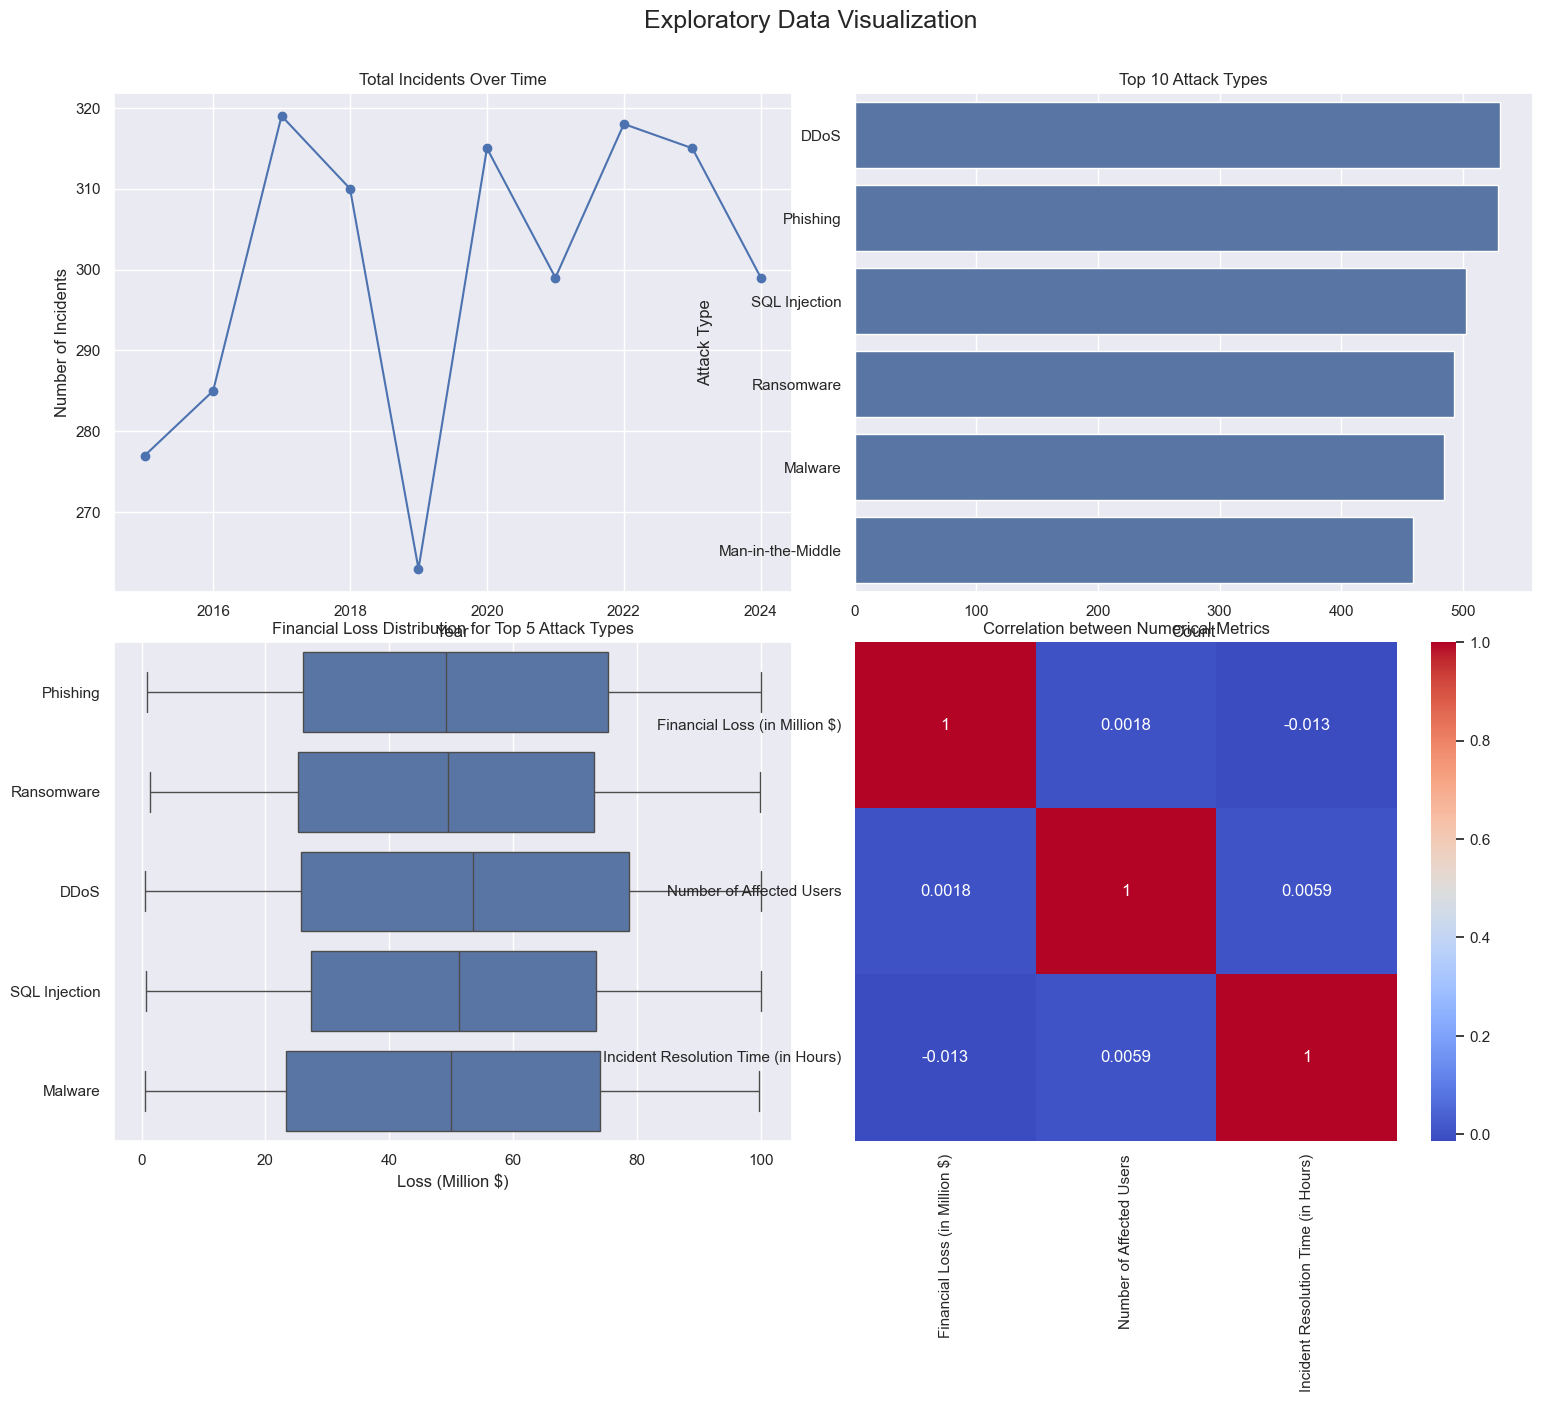

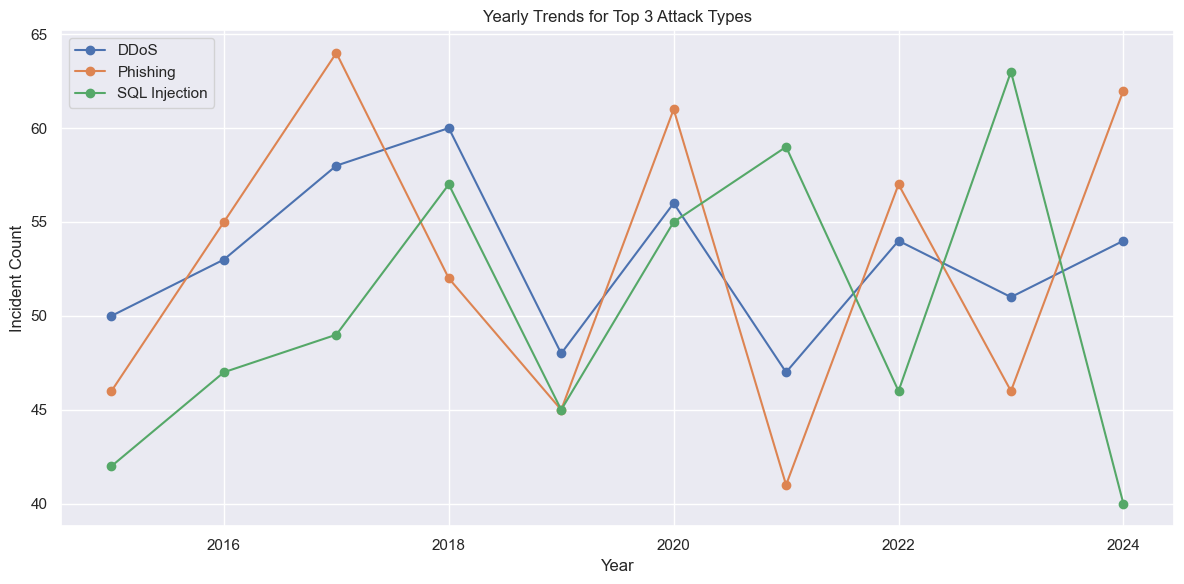

In [12]:
# 1) Apply Seaborn theme
sns.set_theme()

# 2) Compute total incidents per year
incidents_per_year = (
    df
    .groupby('Year')
    .size()
    .reset_index(name='Incident_Count')
)

# 3) Set up a 2×2 grid
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.tight_layout(rect=[0, 0, 1, 0.93])
fig.suptitle('Exploratory Data Visualization', fontsize=18)

# — Plot 1: Total incidents over time —
axes[0,0].plot(
    incidents_per_year['Year'],
    incidents_per_year['Incident_Count'],
    marker='o'
)
axes[0,0].set_title('Total Incidents Over Time')
axes[0,0].set_xlabel('Year')
axes[0,0].set_ylabel('Number of Incidents')

# — Plot 2: Top 10 attack types (overall) —
top_attacks = (
    df['Attack Type']
    .value_counts()
    .nlargest(10)
)
sns.barplot(
    x=top_attacks.values,
    y=top_attacks.index,
    ax=axes[0,1]
)
axes[0,1].set_title('Top 10 Attack Types')
axes[0,1].set_xlabel('Count')
axes[0,1].set_ylabel('Attack Type')

# — Plot 3: Distribution of Financial Loss by Attack Type —
#    (showing only top 5 types for readability)
top5 = top_attacks.index[:5]
sns.boxplot(
    y='Attack Type',
    x='Financial Loss (in Million $)',
    data=df[df['Attack Type'].isin(top5)],
    ax=axes[1,0]
)
axes[1,0].set_title('Financial Loss Distribution for Top 5 Attack Types')
axes[1,0].set_xlabel('Loss (Million $)')
axes[1,0].set_ylabel('')

# — Plot 4: Correlation heatmap of numerical fields —
num_cols = [
    'Financial Loss (in Million $)',
    'Number of Affected Users',
    'Incident Resolution Time (in Hours)'
]
corr = df[num_cols].corr()
sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    ax=axes[1,1]
)
axes[1,1].set_title('Correlation between Numerical Metrics')

plt.show()


# — Additional detail: Trends of top 3 attack types over time —
plt.figure(figsize=(12,6))
for atk in top_attacks.index[:3]:
    yearly = (
        df[df['Attack Type']==atk]
        .groupby('Year')
        .size()
        .rename(atk)
    )
    plt.plot(yearly.index, yearly.values, marker='o', label=atk)

plt.title('Yearly Trends for Top 3 Attack Types')
plt.xlabel('Year')
plt.ylabel('Incident Count')
plt.legend()
plt.tight_layout()
plt.show()

In [8]:
'''
Step 4: Ask and answer questions about the data
• Ask at least 5 questions about your dataset
• Answer the questions either by computing the results or by plotting graphs
• Create new columns, merge multiple datasets, and perform grouping/aggregation
whenever necessary
'''


'\nStep 4: Ask and answer questions about the data\n• Ask at least 5 questions about your dataset\n• Answer the questions either by computing the results or by plotting graphs\n• Create new columns, merge multiple datasets, and perform grouping/aggregation\nwhenever necessary\n'

In [ ]:
'''
Step 5: Summarize your inferences and write a conclusion
• Write a summary of what you've learned from the analysis
• Include interesting insights and graphs from previous sections
• Share ideas for future work
• Share the links to resources used
'''